In [96]:
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
from copulae import *
from KDEs import *
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('../processed_data/btc_future_crix.csv')
data.head()

ecdf_brr = ECDF(data.return_brr)
ecdf_btc = ECDF(data.return_btc)

u = ecdf_brr(data.return_brr)
v = ecdf_btc(data.return_btc)

In [39]:
kde_brr = KDE(data.return_brr, "Gaussian")
kde_btc = KDE(data.return_btc, "Gaussian")

C1 = Gaussian(rho=0.9, Law_RS=kde_brr, Law_RF=kde_btc) # fix the maringals!

In [48]:
%%time
x_arr = np.linspace(-.05,.05,40)
results = []
for x in x_arr:
    results.append(C1.f_RH(h=1,r_h=x))
    print(x)

-0.05
-0.04743589743589744
-0.04487179487179487
-0.04230769230769231
-0.03974358974358975
-0.037179487179487186
-0.03461538461538462
-0.032051282051282055
-0.02948717948717949
-0.026923076923076925
-0.024358974358974363
-0.021794871794871797
-0.019230769230769232
-0.01666666666666667
-0.014102564102564108
-0.011538461538461539
-0.008974358974358977
-0.006410256410256415
-0.0038461538461538464
-0.0012820512820512844
0.0012820512820512775
0.0038461538461538464
0.006410256410256408
0.00897435897435897
0.011538461538461539
0.014102564102564094
0.016666666666666663
0.019230769230769232
0.021794871794871787
0.024358974358974356
0.026923076923076925
0.02948717948717948
0.03205128205128205
0.03461538461538462
0.03717948717948717
0.03974358974358974
0.04230769230769231
0.044871794871794865
0.047435897435897434
0.05
CPU times: user 2min 22s, sys: 854 ms, total: 2min 23s
Wall time: 2min 23s


[nan, nan, nan, nan, nan, 2.759769557502906, 3.2924145779142466, 3.9801898044001223, 4.799463159074853, 5.809961491827739, 6.951796936922515, 8.323643290454632, 9.980388198820929, 11.93106474617856, 14.17999352535532, 16.6018605082189, 19.15750117093665, 21.561641000205494, 23.519282463879147, 24.80845329652751, 25.078106193410136, 24.34700578758366, 22.7388289453437, 20.49389600410262, 17.881822475522142, 15.182588866108322, 12.679268169094708, 10.415129410219281, 8.489189482823, 6.8659856501663405, 5.537211019894104, nan, nan, nan, nan, nan, nan, nan, nan, nan]


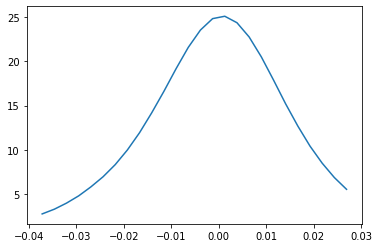

In [49]:
plt.plot(x_arr, results)
print(results)

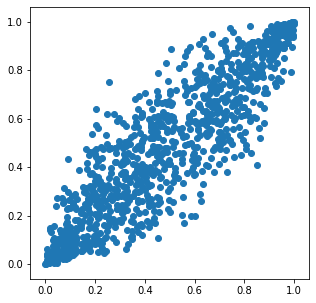

In [81]:
size = 1000
C1 = Gaussian(rho=0.9, Law_RS=stats.uniform, Law_RF=stats.uniform) # fix the maringals!
s = C1.sample(size)
plt.figure(figsize=(5,5))
plt.scatter(s[:,0],s[:,1])

0.7663316582914572


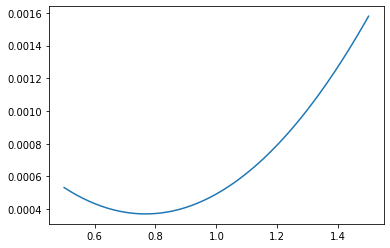

In [88]:
r1 = np.quantile(kde_brr.rvs(size*10), s[:,0])
r2 = np.quantile(kde_btc.rvs(size*10), s[:,1])
h=1
h_arr = np.linspace(0.5,1.5, 200)
variance = []
for h in h_arr:
    rh = r1- h*r2
#     sns.distplot(rh)
    variance.append(np.var(rh))
plt.plot(h_arr, variance)
print(h_arr[np.argmin(variance)])

In [89]:
kde_brr = KDE(data.return_brr, "Gaussian")
kde_btc = KDE(data.return_btc, "Gaussian")

C1 = Gaussian(rho=0.9, Law_RS=kde_brr, Law_RF=kde_btc) # fix the maringals!

In [91]:
%%time
C1.f_RH(1,0)

CPU times: user 3.47 s, sys: 19.1 ms, total: 3.49 s
Wall time: 3.5 s


25.06350101531268

In [93]:
C2 = Gaussian(rho=0.9, Law_RS=stats.norm, Law_RF=stats.norm)  # fix the maringals!

In [94]:
%%time
C2.f_RH(1,0)

CPU times: user 582 ms, sys: 6.49 ms, total: 589 ms
Wall time: 588 ms


0.8913227419959173

In [36]:
NIG = norminvgauss(1,0,0,1)
C3 = Gaussian(rho=0.9, Law_RS=NIG, Law_RF=NIG)  # fix the maringals!

In [37]:
%%time
C3.f_RH(1,0)

CPU times: user 1min 6s, sys: 327 ms, total: 1min 6s
Wall time: 1min 6s


0.9686962118411393

In [6]:
%%time
kde_brr.ppf(0.4)

CPU times: user 500 µs, sys: 215 µs, total: 715 µs
Wall time: 551 µs


-0.004094185931209126

In [7]:
%%time
stats.norm.ppf(0.4)

CPU times: user 418 µs, sys: 172 µs, total: 590 µs
Wall time: 501 µs


-0.2533471031357997

In [8]:
%%time
kde_brr.cdf(0.4)

CPU times: user 31 µs, sys: 7 µs, total: 38 µs
Wall time: 36.2 µs


1.0

In [9]:
%%time
stats.norm.cdf(0.4)

CPU times: user 190 µs, sys: 15 µs, total: 205 µs
Wall time: 201 µs


0.6554217416103242

In [10]:
%%time
kde_brr.pdf(0.4)

CPU times: user 1.34 ms, sys: 97 µs, total: 1.44 ms
Wall time: 1.37 ms


2.7187551328187618e-163

In [11]:
%%time
stats.norm.pdf(0.4)

CPU times: user 213 µs, sys: 18 µs, total: 231 µs
Wall time: 223 µs


0.36827014030332333

In [12]:
# Gaussian, t_Copula, Clayton, Frank, Gumbel
C1 = Gaussian(rho=0.9,        Law_RS=kde_brr, Law_RF=kde_btc) # fix the maringals!
C2 = t_Copula(rho=0.1, nu=4,  Law_RS=kde_brr, Law_RF=kde_btc) 
C3 = Clayton( theta=0.1,      Law_RS=kde_brr, Law_RF=kde_btc)
C4 = Frank(   theta=0.1,      Law_RS=kde_brr, Law_RF=kde_btc)
C5 = Gumbel(   theta=3,       Law_RS=kde_brr, Law_RF=kde_btc)

Copulae_names = ['Gaussian', 't_Copula', 'Clayton', 'Frank', 'Gumbel']
Copulae_arr = [C1,C2,C3,C4,C5]

Copulae = dict(zip(Copulae_names, Copulae_arr))

In [13]:
for C_name in Copulae:
    Copulae[C_name].canonical_calibrate(u,v)
    print(C_name,'is done.\n')

/Users/francis/Google Drive/00_IRTG1792/copula/Py_notebooks/copulae.py:77: RuntimeWarning: invalid value encountered in true_divide
  return np.nanmean(np.log(part1/part2))


Optimization terminated successfully.
         Current function value: -0.436606
         Iterations: 33
         Function evaluations: 67
Gaussian is done.

Optimization terminated successfully.
         Current function value: -0.515522
         Iterations: 198
         Function evaluations: 383
t_Copula is done.

Optimization terminated successfully.
         Current function value: -0.394737
         Iterations: 43
         Function evaluations: 92
Clayton is done.

Optimization terminated successfully.
         Current function value: -0.413272
         Iterations: 47
         Function evaluations: 102
Frank is done.

Optimization terminated successfully.
         Current function value: -0.456857
         Iterations: 36
         Function evaluations: 78
Gumbel is done.



In [14]:
# parameters
print("Parameters:"  ,
      "\nGaussian :" , C1.rho,
      "\nt        :" , C2.rho, C2.nu, 
      "\nClayton  :" , C3.theta,
      "\nFrank    :" , C4.theta,
      "\nGumbel   :" , C5.theta)

Parameters: 
Gaussian : 0.7682137557864189 
t        : 0.7758135540378888 2.0000000000019984 
Clayton  : 1.9376202894747336 
Frank    : 7.1803941336274395 
Gumbel   : 2.262103709019719


In [15]:
# Likelihood
print("Log Likelihood:",
      "\nGaussian :"   , C1.l_fn(C1.rho, u,v),
      "\nt        :"   , C2.l_fn(C2.nu, C2.rho, u,v),
      "\nClayton  :"   , C3.l_fn(C3.theta, u,v),
      "\nFrank    :"   , C4.l_fn(C4.theta, u,v),
      "\nGumbel   :"   , C5.l_fn(C5.theta, u,v))

Log Likelihood: 
Gaussian : 0.4445017729067782 
t        : 0.5175515286733854 
Clayton  : 0.3947361089938826 
Frank    : 0.4132697635994375 
Gumbel   : 0.45685655378875256


In [16]:
print(C1.VaR(q=0.1, h=1),
      C2.VaR(q=0.1, h=1),
      C3.VaR(q=0.1, h=1),
      C4.VaR(q=0.1, h=1),
      C5.VaR(q=0.1, h=1) )

/Users/francis/Google Drive/00_IRTG1792/copula/Py_notebooks/copulae.py:227: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I = integrate.quad(func, 0.0001, 0.999)


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 38
         Function evaluations: 89


/Users/francis/Google Drive/00_IRTG1792/copula/Py_notebooks/copulae.py:316: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I = integrate.quad(func, 0.0001, 0.999)


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 36
         Function evaluations: 86


/Users/francis/Google Drive/00_IRTG1792/copula/Py_notebooks/copulae.py:397: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I = integrate.quad(func, 0.0001, 0.999)


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 36
         Function evaluations: 84
-0.023819989377262415 -0.0636741944469307 -0.03811132812500001 -0.039490234375000016 -0.03462207031250002


In [33]:
C1a = Gaussian(C1.rho, stats.norm, stats.norm)
results = []
# h_arr = np.linspace(0.8,1.2,20)
x_arr = np.linspace(-5,5, 60)
for x in x_arr:
    results.append(C1a.f_RH(r_h=x, h=1))

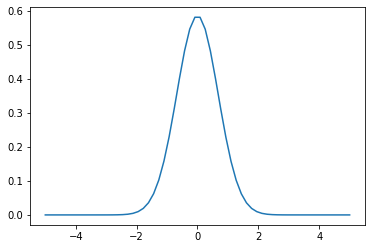

In [34]:
plt.plot(x_arr, results)

In [8]:
h_arr = np.linspace(0.1,1.9,20)

VaR_results = np.ones((5, len(h_arr)))

q=0.01

for i in range(len(h_arr)):
    for j in range(len(Copulae_names)):
        VaR_results[j,i] = Copulae[Copulae_names[j]].VaR(q=q, h=h_arr[i])
        print(i,j)

0 0
0 1


/Users/francis/Google Drive/00_IRTG1792/copula/Py_notebooks/copulae.py:192: RuntimeWarning: overflow encountered in power
  B = t**(-self.theta)-1


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 47
         Function evaluations: 94
0 2


/Users/francis/Google Drive/00_IRTG1792/copula/Py_notebooks/copulae.py:279: RuntimeWarning: divide by zero encountered in log
  return -np.log(A/B)


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 47
         Function evaluations: 94
0 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 47
         Function evaluations: 94
0 4
1 0
1 1
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 47
         Function evaluations: 94
1 2
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 47
         Function evaluations: 94
1 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 47
         Function evaluations: 94
1 4
2 0
2 1
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 48
         Function evaluations: 96
2 2
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 47
         Function evaluation

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 49
         Function evaluations: 98
19 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 48
         Function evaluations: 96
19 4


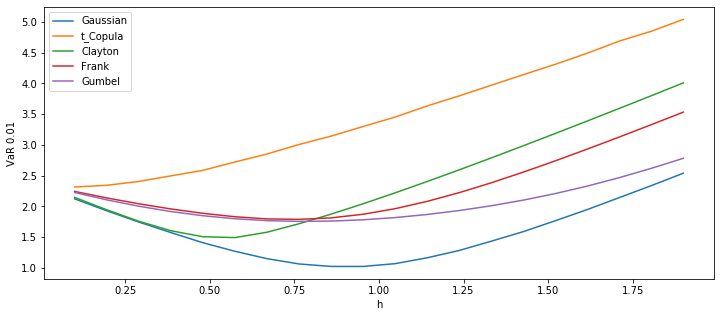

In [9]:
plt.figure(figsize=(12,5))
plt.xlabel("h")
plt.ylabel('VaR 0.01')
for i in range(len(Copulae_names)):
    plt.plot(h_arr, -VaR_results[i,:], label=Copulae_names[i])
plt.legend()

In [20]:
Copulae['t_Copula'].VaR(q=0.01, h=0.5)

-2.610984460736378

In [16]:
t_Copula(nu=C2.nu, rho=C2.rho, Law_RS=C2.Law_RS, Law_RF=C2.Law_RF).VaR(q=0.01,h=0.5)

-1.696655957834563

Gaussian, Frank and Gumbel tend to give a lower value of VaR. 

In [35]:
x_arr = np.linspace(-5,5,30)
density = np.ones((len(x_arr), len(h_arr)))

for j in range(len(h_arr)):
    for i in range(len(x_arr)):
        density[i,j]=Copulae['t_Copula'].f_RH(h=h_arr[j], r_h=x_arr[i])

In [85]:
rh_results = []

r = Copulae['t_Copula'].sample(10000)
h_arr = np.linspace(-1,1,20)

for h in h_arr:
    rh = r[:,0]-h*r[:,1]
    rh_results.append(rh)

In [110]:
C7 = t_Copula(nu=2, rho=C2.rho, Law_RS=stats.norm, Law_RF=stats.norm)
v = []
for i in range(len(h_arr)):
    v.append(-C7.VaR(q=0.01, h=h_arr[i]))

In [100]:
v = []
for i in range(len(h_arr)):
    v.append(-np.quantile(rh_results[i], 0.01))

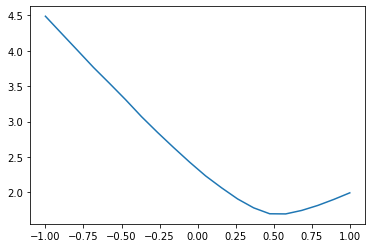

In [111]:
plt.plot(h_arr, v)

In [62]:
C6 = t_Copula(rho=0.77, nu=100, Law_RS=stats.norm, Law_RF=stats.norm)

r = C6.sample(10000)
h_arr = np.linspace(-1,1,20)
rh_results = []

for h in h_arr:
    rh = r[:,0]-h*r[:,1]
    rh_results.append(rh)


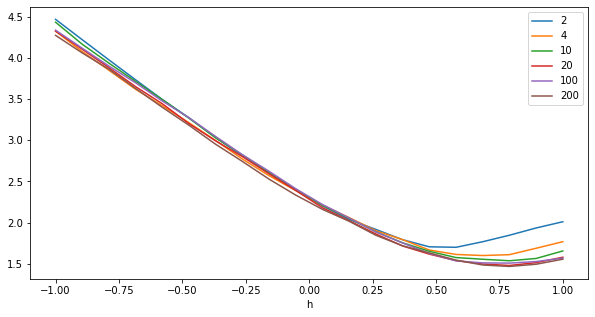

In [83]:
nu_arr = [2,4,10,20,100,200]


VaR_t_Copula = np.ones((len(h_arr), len(nu_arr)))

for j in range(len(nu_arr)):
    C6 = t_Copula(rho=C2.rho, nu=nu_arr[j], Law_RS=stats.norm, Law_RF=stats.norm)
    r = C6.sample(10000)
    for i in range(len(h_arr)):
        rh = r[:,0]-h_arr[i]*r[:,1]
        VaR_t_Copula[i,j]=-np.quantile(rh,0.01)
        
        
plt.figure(figsize=(10,5))        
for j in range(len(nu_arr)):
    plt.plot(h_arr, VaR_t_Copula[:,j], label=nu_arr[j])   
    
plt.xlabel('h')
plt.legend()

Text(0, 0.5, '$F_Y(Y)$')

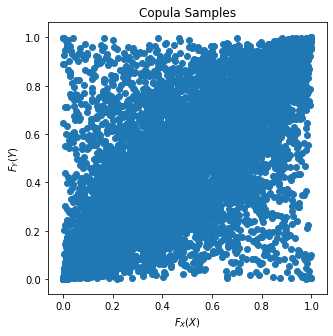

In [436]:
import itertools
size= 10000
# i_arr = np.linspace(0.0001,.999,size)
# I = np.array(list(itertools.product(i_arr, repeat=2)))
# I = Gaussian(0.9, stats.uniform, stats.uniform).sample(size)
I = t_Copula(0.776,2, stats.uniform, stats.uniform).sample(size)

plt.figure(figsize=(5,5))
plt.scatter(I[:,0],I[:,1])
plt.title("Copula Samples")
plt.xlabel(r"$F_X(X)$")
plt.ylabel(r"$F_Y(Y)$")

In [437]:
rs = np.array([kde_brr.ppf(i) for i in I[:,0]])
rf = np.array([kde_btc.ppf(i) for i in I[:,1]])

# rs = np.array([norm.ppf(i) for i in I[:,0]])
# rf = np.array([norm.ppf(i) for i in I[:,1]])

h=1
rh = rs - h*rf

Text(0, 0.5, '$F_Y(Y)$')

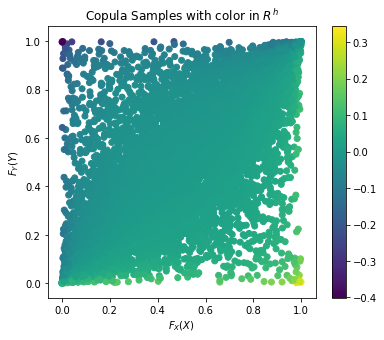

In [438]:
plt.figure(figsize=(6,5))
plt.scatter(I[:,0],I[:,1], c=rh)
plt.colorbar()
plt.title(r"Copula Samples with color in $R^h$")
plt.xlabel(r"$F_X(X)$")
plt.ylabel(r"$F_Y(Y)$")

Text(0, 0.5, '$F_Y(Y)$')

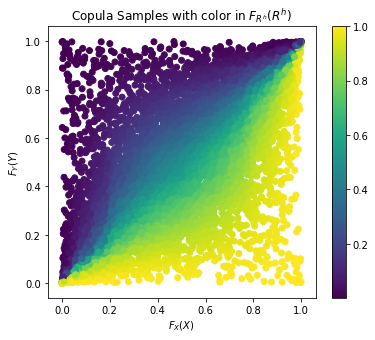

In [439]:
plt.figure(figsize=(6,5))
plt.scatter(I[:,0],I[:,1], c=ECDF(rh)(rh))
plt.colorbar()
plt.title(r"Copula Samples with color in $F_{R^h}(R^h)$")
plt.xlabel(r"$F_X(X)$")
plt.ylabel(r"$F_Y(Y)$")

Exponential Risk Measure
$$
ERM(R^h) =- \int_0^1 \frac{ke^{-ks}}{1-e^{-k}}\cdot F_{R^h}^{-1}(R^h) ds
$$

The function is putting different weights according to the "rank" ($s=F_{R^h}(R^h)$)

Let 
$$
w_k(s) = \frac{ke^{-ks}}{1-e^{-k}}
$$

Text(0, 0.5, '$w_{k=10}(s)$')

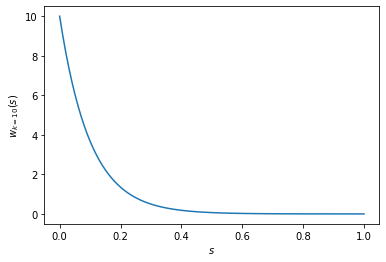

In [440]:
def weight(k,s):
    return k*np.exp(-k*s)/(1-np.exp(-k))

s_arr = np.linspace(0,1,100)
k=10
ERM_arr = []
for s in s_arr:
    ERM_arr.append(weight(k,s))
plt.plot(s_arr,ERM_arr)
plt.xlabel(r'$s$')
plt.ylabel(r'$w_{k=%s}(s)$'%k)

Text(0, 0.5, '$F_Y(Y)$')

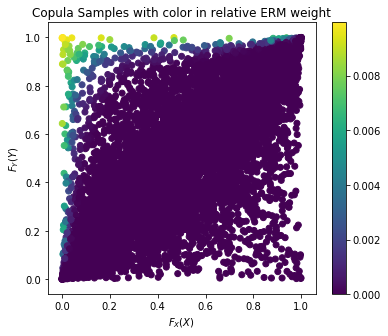

In [441]:
def ERM_weight(k,s):
    return k*np.exp(-k*s)/(1-np.exp(-k))

k=100

w = ERM_weight(k,ECDF(rh)(rh)) 
w_relative = w/np.sum(w)

df = pd.DataFrame(I, columns=['u','v'])
df.loc[:,'w'] = w_relative 

plt.figure(figsize=(6,5))
plt.scatter(I[:,0],I[:,1], c=w_relative )
plt.colorbar()

plt.title(r"Copula Samples with color in relative ERM weight")
plt.xlabel(r"$F_X(X)$")
plt.ylabel(r"$F_Y(Y)$")

In [363]:
import plotly.express as px

fig = px.scatter(df, x='u', y='v', color='w')
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20))
fig.show()

In [362]:
sum(w_relative * rh)

-0.10011863472169297

In [326]:
fig = go.Figure(data=[go.Scatter(df, x='u',y='v',
                                 mode='markers')])
fig.show()

ValueError: The first argument to the plotly.graph_objs.Scatter 
constructor must be a dict or 
an instance of :class:`plotly.graph_objs.Scatter`

In [453]:
size= 100
i_arr = np.linspace(0.0001,.999,size)
I = np.array(list(itertools.product(i_arr, repeat=2)))

# rs = np.array([kde_brr.ppf(i) for i in I[:,0]])
# rf = np.array([kde_btc.ppf(i) for i in I[:,1]])

rs = np.array([norm.ppf(i) for i in I[:,0]])
rf = np.array([norm.ppf(i) for i in I[:,1]])

h=1
rh = rs - h*rf

ecdf_rh = ECDF(rh)

In [460]:
import plotly.graph_objects as go
# fig = go.Figure(data=[go.Surface(z=rh, x=I[0,:], y=I[1,:])])
# fig = go.Figure(data=[go.Surface(z=rh.reshape((size,size)), x=i_arr, y=i_arr), 
#                      go.Scatter3d(x=I[zero_id,0], y=I[zero_id,1], z=rh[zero_id])]) 
fig = go.Figure(data=[go.Surface(z=-ecdf_rh(rh.reshape((size,size))), x=i_arr, y=i_arr)])
fig.show()

In [461]:
import plotly.graph_objects as go
zero_id = np.abs(rh)<=0.1
# fig = go.Figure(data=[go.Surface(z=rh, x=I[0,:], y=I[1,:])])
# fig = go.Figure(data=[go.Surface(z=rh.reshape((size,size)), x=i_arr, y=i_arr), 
#                      go.Scatter3d(x=I[zero_id,0], y=I[zero_id,1], z=rh[zero_id])]) 
fig = go.Figure(data=[go.Surface(z=ERM_weight(10,-ecdf_rh(rh.reshape((size,size)))), x=i_arr, y=i_arr)])
fig.show()

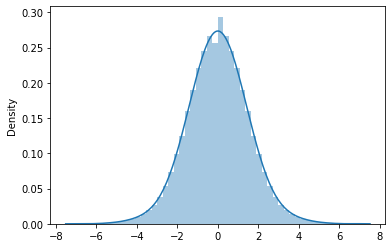

In [252]:
import plotly.graph_objects as go
zero_id = np.abs(rh)<=0.01
# fig = go.Figure(data=[go.Surface(z=rh, x=I[0,:], y=I[1,:])])
fig = go.Figure(data=[go.Surface(z=rh.reshape((size,size)), x=i_arr, y=i_arr), 
                     go.Scatter3d(x=I[zero_id,0], y=I[zero_id,1], z=rh[zero_id])])            
fig.show()

In [415]:
fn = lambda x1, x2, z: norm.cdf(x1) * norm.cdf(x2) * norm.pdf(x1-z) * norm.pdf(x2-z) * norm.pdf(z)
scipy.integrate.nquad(fn, [[-1, 1],[-1, 1], [-1, 1]])

(0.06656093345182415, 7.389748085875797e-16)

In [373]:
fn0 = lambda z, x1, x2: norm.pdf(x1-z) * norm.pdf(x2-z) * norm.pdf(z)
fn1 = lambda x1, x2: norm.cdf(x1) * norm.cdf(x2) * scipy.integrate.quad(fn0, a=-np.inf, b=np.inf, args=(x1,x2))[0]

In [412]:
from tqdm import tqdm
size1d = 100
L = 20
x1_arr = np.linspace(-L,L,size1d)
x2_arr = np.linspace(-L,L,size1d)

Area = (L*2/size1d)**2

grids = np.array(np.meshgrid(x1_arr, x2_arr)).reshape(size1d **2,2)

results = []
for grid in tqdm(grids):
    results.append(fn1(grid[0],grid[1]))

100%|██████████| 10000/10000 [06:58<00:00, 23.91it/s]


In [413]:
sum(results)*Area

3.8305101816106006

In [411]:
sum(results)*Area

2.511210872996825